##  코드 작성일은 21대 총선 전이기 때문에 인구수를 시각화

In [1]:
import platform

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [2]:
BORDER_LINES = [
    [[1, 1, 5, 5, 1], [18, 20, 20, 18, 18]],# 광주광역시
    [[1, 2, 2, 5, 5, 1, 1, 3, 3, 0, 0, 1, 1], [22, 22, 21, 21, 20, 20, 18, 18, 17, 17, 20, 20, 22]],# 전라남도
    [[14, 14, 15, 15, 16, 16, 16, 14], [20, 22, 22, 21, 21, 21, 20, 20]],# 제주도
    [[2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 2], [14, 16, 16, 17, 17, 18, 18, 16, 16, 14, 14]],# 전라북도
    [ [4, 4, 6, 6, 7, 7, 6, 6, 4], [14, 16, 16, 15, 15, 12, 12, 14, 14]],# 대전광역시
    [[4, 4, 6, 6], [14, 13, 13, 14]],# 세종특별시
    [[2, 1, 1, 2, 2, 3, 3, 5, 5, 6, 6], [14, 14, 13, 13, 12, 12, 10, 10, 12, 12, 13]],# 충청남도
    [[2, 1, 1, 0, 0, 2, 2, 3, 3, 4, 4] , [12, 12, 10, 10, 7, 7, 8, 8, 9, 9, 10]], # 인천광역시
    [[9, 9, 6, 6, 5, 4, 4, 2, 2, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 12, 12, 14, 14, 13, 13],
    [1, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 8, 8, 9, 9, 10, 10, 12, 12, 12, 10, 10, 9, 9, 3]], # 경기도
    [[13, 9, 9, 12, 12, 11, 11, 8, 8, 5, 5, 3, 3, 4, 4, 6, 6, 7, 7, 9],
     [3, 3, 4, 4, 7, 7, 8, 8, 9, 9, 8, 8, 6, 6, 3, 3, 2, 2, 1, 1]], # 경기도
    [[9, 10, 10, 11, 11, 13, 13, 12, 12, 9],
     [1, 1, 2, 2, 3, 3, 1, 1, 0, 0]], # 강원도
    [[5, 6, 6, 7, 7, 8, 8, 9, 9, 7, 7],
     [21, 21, 22, 22, 19, 19, 17, 17, 16, 16, 15]], # 경상남도
    [[7, 9, 9, 12, 12, 13, 13, 14, 14, 12, 12, 10, 10, 9],
     [20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 16, 16]], # 부산광역시
    [[7, 9, 9, 10, 10, 12, 12], [13, 13, 14, 14, 13, 13, 15]], # 대구광역시
    [[12, 13, 13, 15, 15, 14, 14], [14, 14, 13, 13, 14, 14, 16]], # 울산광역시
    [[12, 12, 13, 13, 14, 14, 13, 13, 14, 14, 15, 15, 16, 16, 15, 15],
     [13, 12, 12, 10, 10, 9, 9, 6, 6, 9, 9, 11, 11, 12, 12, 13]], # 경상북도
]

In [3]:
election_map = pd.read_excel('../data/korea_map_21th_election_type_b_displayname.xlsx')
election_voter = pd.read_excel('../data/korea_voter_21th_election.xlsx')

In [4]:
election_map.head()

,X,Y,선거구명 전체,시도명,선거구명,표기이름
0,0,7,인천 서구갑,인천,서구갑,서구 갑
1,0,8,인천 서구을,인천,서구을,서구 을
2,0,9,인천 중구강화군옹진군,인천,중구강화군옹진군,중구\n강화\n옹진
3,0,17,전남 목포시,전남,목포시,목포
4,0,18,전남 나주시화순군,전남,나주시화순군,나주 화순


In [5]:
election_voter.head()

,선거구명,유권자 수,광역시도명,시도명,선거구명 전체
0,전주시갑,171863,전라북도,전북,전북 전주시갑
1,전주시을,199526,전라북도,전북,전북 전주시을
2,전주시병,284058,전라북도,전북,전북 전주시병
3,군산시,268750,전라북도,전북,전북 군산시
4,익산시갑,136377,전라북도,전북,전북 익산시갑


In [6]:
# 데이터 결합
election = pd.merge(election_map, election_voter, on='선거구명 전체')
election.head()

,X,Y,선거구명 전체,시도명_x,선거구명_x,표기이름,선거구명_y,유권자 수,광역시도명,시도명_y
0,0,7,인천 서구갑,인천,서구갑,서구 갑,서구갑,270999,인천광역시,인천
1,0,8,인천 서구을,인천,서구을,서구 을,서구을,273244,인천광역시,인천
2,0,9,인천 중구강화군옹진군,인천,중구강화군옹진군,중구\n강화\n옹진,중구강화군옹진군,227006,인천광역시,인천
3,0,17,전남 목포시,전남,목포시,목포,목포시,229018,전라남도,전남
4,0,18,전남 나주시화순군,전남,나주시화순군,나주 화순,나주시화순군,177015,전라남도,전남


In [7]:
# 결측치 조회
election[election['유권자 수'].isnull()]

,X,Y,선거구명 전체,시도명_x,선거구명_x,표기이름,선거구명_y,유권자 수,광역시도명,시도명_y


In [8]:
def draw(data, cmapname, col):
    gamma = 0.75
    whitelabelmin = 20.

    mapdata = data.pivot_table(index='Y', columns='X', values='유권자 수')

    plt.figure(figsize=(20, 20))
    plt.pcolor(mapdata, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    for idx, row in election.iterrows():
        name = row[col]
        plt.annotate(name, (row['X']+0.5, row['Y']+0.5), weight='bold',
                     fontsize=15, ha='center', va='center', color='black')
    
    for path in BORDER_LINES:
        x, y = path
        plt.plot(x, y, c='black', lw=3)
    
    plt.gca().invert_yaxis()

    #cb = plt.colorbar(shrink=.1, aspect=10)
    #cb.set_label()

    plt.axis('off')
    plt.tight_layout()
    
    #plt.savefig('../result.png')
    plt.show()

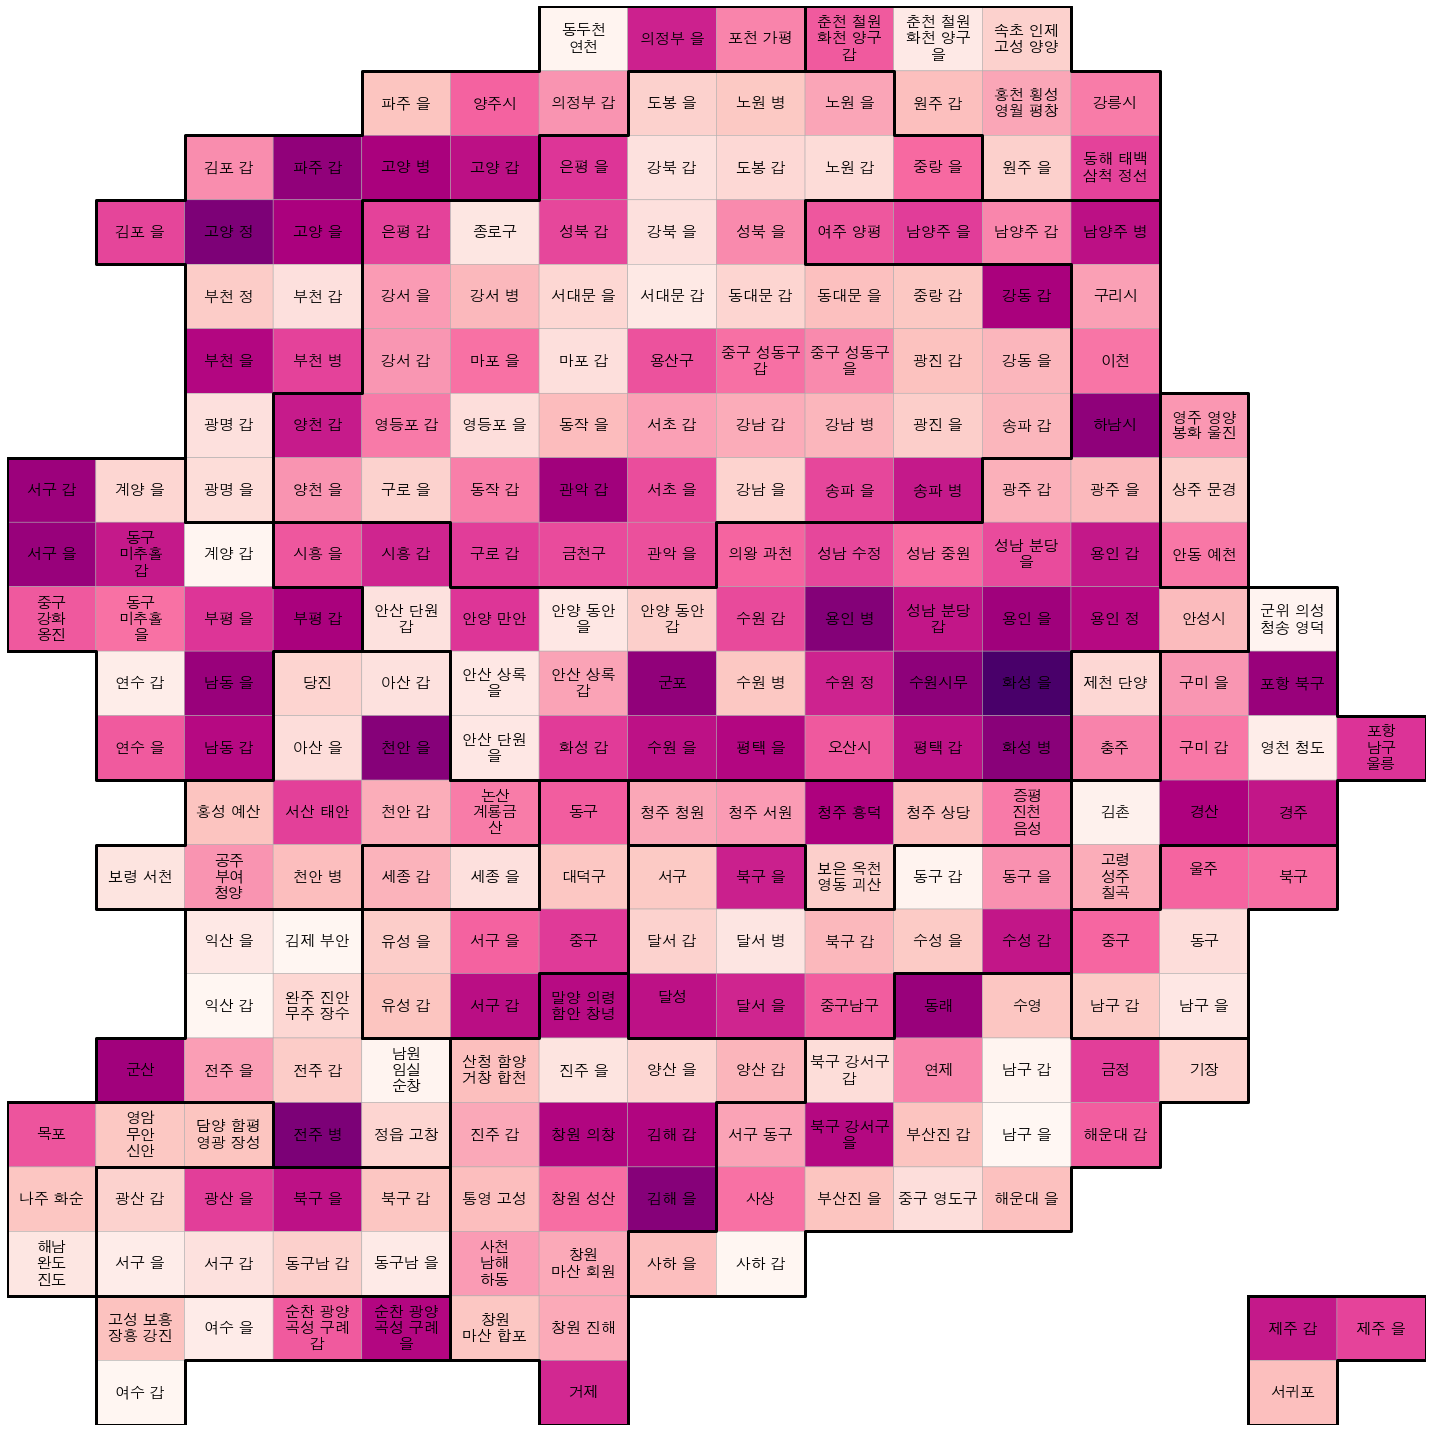

In [9]:
draw(election, 'RdPu', '표기이름')

In [10]:
def draw2(data, cmapname, col):
    gamma = 0.75
    whitelabelmin = 20.

    mapdata = data.pivot_table(index='Y', columns='X', values='SUCCESSFUL', aggfunc='first')

    plt.figure(figsize=(20, 20))
    plt.pcolor(mapdata, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    for idx, row in election.iterrows():
        plt.annotate(row[col], (row['X']+0.5, row['Y']+0.5), fontsize=15, ha='center', va='center', color='black')

    for path in BORDER_LINES:
        x, y = path
        plt.plot(x, y, c='black', lw=3)
    
    #cb = plt.colorbar(shrink=.1, aspect=10)
    #cb.set_label()
    
    plt.gca().invert_yaxis()

    plt.axis('off')
    plt.tight_layout()
    
    #plt.savefig('../result.png')
    plt.show()
    

In [11]:
successful = election.copy()

color = [i * 1.25 for i in range(len(successful['시도명_x'].unique()))]

for sido in successful['시도명_x'].unique():
    successful.loc[successful['시도명_x'] == sido, 'SUCCESSFUL'] = color[list(successful['시도명_x'].unique()).index(sido)]

successful

,X,Y,선거구명 전체,시도명_x,선거구명_x,표기이름,선거구명_y,유권자 수,광역시도명,시도명_y,SUCCESSFUL
0,0,7,인천 서구갑,인천,서구갑,서구 갑,서구갑,270999,인천광역시,인천,0.00
1,0,8,인천 서구을,인천,서구을,서구 을,서구을,273244,인천광역시,인천,0.00
2,0,9,인천 중구강화군옹진군,인천,중구강화군옹진군,중구\n강화\n옹진,중구강화군옹진군,227006,인천광역시,인천,0.00
3,0,17,전남 목포시,전남,목포시,목포,목포시,229018,전라남도,전남,1.25
4,0,18,전남 나주시화순군,전남,나주시화순군,나주 화순,나주시화순군,177015,전라남도,전남,1.25
...,...,...,...,...,...,...,...,...,...,...,...
248,14,13,울산 북구,울산,북구,북구,북구,218299,울산광역시,울산,18.75
249,14,20,제주 제주시갑,제주,제주시갑,제주 갑,제주시갑,253218,제주특별자치도,제주,20.00
250,14,21,제주 서귀포시,제주,서귀포시,서귀포,서귀포시,181386,제주특별자치도,제주,20.00
251,15,11,경북 포항시남구울릉군,경북,포항시남구울릉군,포항\n남구\n울릉,포항시남구울릉군,242574,경상북도,경북,17.50


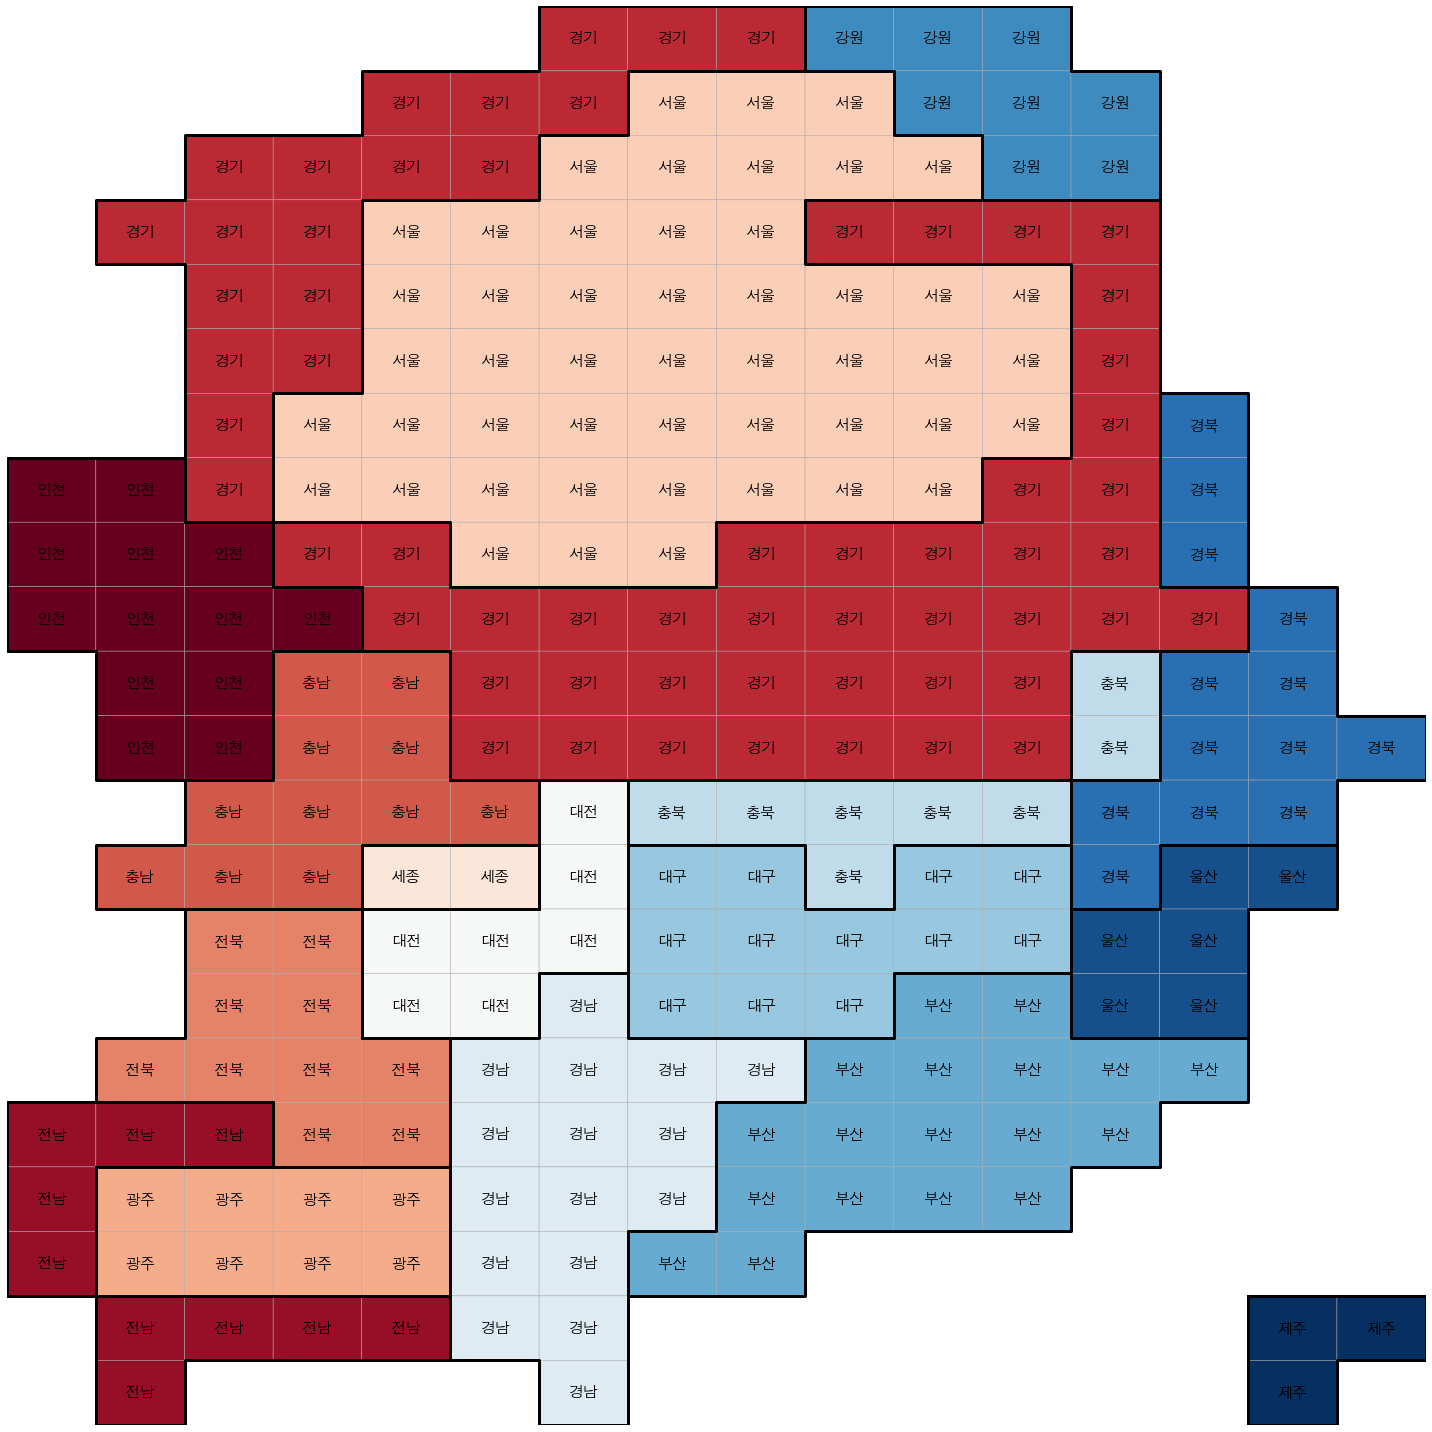

In [12]:
draw2(successful, 'RdBu', '시도명_x')